In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline
import statsmodels.api as sm
import re
import nltk 

import warnings
warnings.filterwarnings('ignore')

In [2]:


df = pd.read_json('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\reviews_Musical_Instruments_5.json.gz', lines=True)

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
asin              10261 non-null object
helpful           10261 non-null object
overall           10261 non-null int64
reviewText        10261 non-null object
reviewTime        10261 non-null object
reviewerID        10261 non-null object
reviewerName      10234 non-null object
summary           10261 non-null object
unixReviewTime    10261 non-null int64
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [ ]:
df.isna().sum()/len(df)

asin              0.000000
helpful           0.000000
overall           0.000000
reviewText        0.000000
reviewTime        0.000000
reviewerID        0.000000
reviewerName      0.002631
summary           0.000000
unixReviewTime    0.000000
dtype: float64

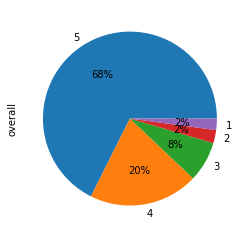

In [ ]:
df.overall.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
for i in list( set(df.columns.tolist()) - set(['helpful']) ):
    print ('Distinct values for {} is {}'.format(i, df[i].nunique() ))
print ('\n')
print (df.dtypes)

Distinct values for asin is 900
Distinct values for reviewerID is 1429
Distinct values for unixReviewTime is 1570
Distinct values for reviewText is 10255
Distinct values for reviewerName is 1397
Distinct values for summary is 8852
Distinct values for overall is 5
Distinct values for reviewTime is 1570


asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object


In [ ]:
# change the over data type to object
df['overall']=df['overall'].astype(str)

df.dtypes

asin              object
helpful           object
overall           object
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

In [ ]:

df1 = df[['reviewText', 'summary','reviewerName','overall']]
print (df1.head())

                                          reviewText  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven...   
4  This pop filter is great. It looks and perform...   

                                 summary  \
0                                   good   
1                                   Jake   
2                   It Does The Job Well   
3          GOOD WINDSCREEN FOR THE MONEY   
4  No more pops when I record my vocals.   

                                       reviewerName overall  
0  cassandra tu "Yeah, well, that's just like, u...       5  
1                                              Jake       5  
2                     Rick Bennette "Rick Bennette"       5  
3                         RustyBill "Sunday Rocker"       5  
4                                     SEAN MASLANKA       5  


In [ ]:
feature_one = df1['reviewText']#.values.tolist()
labels = df1['overall'].values

In [ ]:
import time

beg = time.time()
#feature_one = df1['reviewText']
print (feature_one)
def normalize_texts(features):
    #texts = texts.str.lower().str.replace('[\W]', ' ').str.replace('[^a-z0-1\s]', '')
    processed_features = []

    for sentence in range(0, len(features)):
        # Remove all the special characters
        features[sentence] = re.sub(r'\W', ' ', str(features[sentence]))
        # remove all single characters
        features[sentence]= re.sub(r'\s+[a-zA-Z]\s+', ' ', features[sentence])
        # Remove single characters from the start
        features[sentence] = re.sub(r'\^[a-zA-Z]\s+', ' ', features[sentence])
        # Substituting multiple spaces with single space
        features[sentence] = re.sub(r'\s+', ' ', features[sentence], flags=re.I)
        # Removing prefixed 'b'
        features[sentence] = re.sub(r'^b\s+', '', features[sentence])
        # Converting to Lowercase
        features[sentence]  = features[sentence].lower()
        ##processed_features.append(processed_feature)
    return features
   
#df1['reviewText'] = normalize_texts(df1['reviewText'])  
df1['reviewText'] = normalize_texts(df1['reviewText'])  

print (df1['reviewText'][:5])
end = time.time()
print ('time it took is {}'.format(beg-end))

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
5        So good that I bought another one.  Love the h...
6        I have used monster cables for years, and with...
7        I now use this cable to run from the output of...
8        Perfect for my Epiphone Sheraton II.  Monster ...
9        Monster makes the best cables and a lifetime w...
10       Monster makes a wide array of cables, includin...
11       I got it to have it if I needed it. I have fou...
12       If you are not use to using a large sustaining...
13       I love it, I used this for my Yamaha ypt-230 a...
14       I bought this to use in my home studio to cont...
15       I bought this to use with my keyboard. I wasn'...
16       This Fender cable is the perfect length for me.

In [ ]:
#df1['summary'] = normalize_texts(df1['summary'])  
#print ('1')
#df1['reviewerName'] = normalize_texts(df1['reviewerName'])  
#df1.to_csv('data1.csv', index= False)
#print ('done')

In [ ]:
#Representing Text in Numeric Form
# a. Bag of words = simplest
# Example: Doc1 = "I like to play football", Doc2 = "It is a good game", Doc3 = "I prefer football over rugby"
# vocabulary  = [I, like, to, play, football, it, is, a, good, game, prefer, over, rugby]
# Convert Doc1 into vector features based on the frequency of each words:
# Doc1, the feature vector will look like this: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# b. TF-IDF
#In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

#TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:
#TF  = (Frequency of a word in the document)/(Total words in the document)
#IDF = Log((Total number of docs)/(Number of docs containing the word)) => to weed out words like I, he/she, the, ...



In [ ]:
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = Tf-idfVectorizer #class that can be used to convert text features into TF-IDF feature vectors
vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(feature_one).toarray()

# label = vectorizer.transform(label).toarray() ?

# max_features =2500 =>2500 most frequently occurring words to create a bag of words feature vector.
# Words that occur less frequently are not very useful for classification.
# Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents.
# Words that occur in all documents are too common and are not very useful for classification.
# Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import processed_features

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))